<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-01-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [86]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

1 + 1 # test edit for git commit

2

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# lets have some fun with US macro economic data

# imports
import urllib.request as urlreq
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

% matplotlib inline

# takes FRED api arguments and returns the request
# FRED api documentation - https://research.stlouisfed.org/docs/api/fred/series.html
# api_key and series_id cannot be null
def get_FRED(api_key='b2812b037affbee10b8148d7fe15e552', file_type='json', series_id='', observation_start='', observation_end=''):
    
    # TO-DO
    # ensure series_id is not blank, since it has no default 
    #if series_id != '': 
    
    # set parameter strings, nulls will be not be included
    series_id = '&series_id=' + series_id
    file_type = '&file_type=' + file_type
    api_key = '&api_key=' + api_key
    if observation_start != '': observation_start = '&observation_start=' + observation_start
    if observation_end != '': observation_end = '&observation_end=' + observation_end
    
    # open url
    url_req_string = 'https://api.stlouisfed.org/fred/series/observations?'+ series_id + api_key + file_type + observation_start + observation_end
    url_response = urlreq.urlopen(url_req_string).read()
    url_data = json.loads(url_response)

    return pd.io.json.json_normalize(url_data, 'observations') 

In [88]:
# explore GDP per capita data
gdp_per_cap = get_FRED(series_id = 'UNRATE', observation_start = '1950-01-01', observation_end = '2015-01-01')
gdp_per_cap.head()

,date,realtime_end,realtime_start,value
0,1950-01-01,2018-11-05,2018-11-05,6.5
1,1950-02-01,2018-11-05,2018-11-05,6.4
2,1950-03-01,2018-11-05,2018-11-05,6.3
3,1950-04-01,2018-11-05,2018-11-05,5.8
4,1950-05-01,2018-11-05,2018-11-05,5.5


In [89]:
# let's make this a function to make tings a little easier

def compile_FRED(series_names, series_ids, obs_start, obs_end):
  # series_names - a list of human readable terms for the data series (e.g. gdp)
  # series_ids - a list of the FRED ids corresponding to series_names
  # observation_start - formatted as YYYY-MM-DD
  # observation_end - formatted as YYYY-MM-DD
  
  # TO-DO
  # would be nice to have some control over observation dates between data series
  
  # output is a pandas df joined on observation dates and labeled with series_names
  macro_data = pd.DataFrame()
  
  for i in range(len(series_names)):
    if i == 0: # for the first series, establish dates, all other data series will be joined on these dates
      macro_data['date'], macro_data[series_names[i]] = get_FRED(series_id=series_ids[i], observation_start=obs_start, observation_end=obs_end)['date'], get_FRED(series_id=series_ids[i], observation_start=obs_start, observation_end=obs_end)['value'].astype(float)
  
    else: # for all other dates, get the data and join on first variable dates
      temp_data = pd.DataFrame()
      temp_data['date'], temp_data[series_names[i]] = get_FRED(series_id=series_ids[i], observation_start=obs_start, observation_end=obs_end)['date'], get_FRED(series_id=series_ids[i], observation_start=obs_start, observation_end=obs_end)['value'].astype(float)
      
      macro_data = macro_data.merge(temp_data[['date',series_names[i]]], how='inner', on='date')
      
  
  return macro_data
      
# test function
series_names = ['gdp_per_capita', 'unemployment_rate', 'cpi']
series_ids = ['A939RX0Q048SBEA', 'UNRATE', 'CPIAUCSL']

US_data = compile_FRED(series_names, series_ids, obs_start = '1950-01-01', obs_end = '2015-01-01')
US_data.head()   

,date,gdp_per_capita,unemployment_rate,cpi
0,1950-01-01,14490.0,6.5,23.51
1,1950-04-01,14879.0,5.8,23.65
2,1950-07-01,15388.0,5.0,24.07
3,1950-10-01,15612.0,4.2,24.50
4,1951-01-01,15759.0,3.7,25.38


In [90]:
# exploring the basics, gdp, unemployment, and inflation
series_names = ['gdp_per_capita', 'unemployment_rate', 'cpi'] # all of the data series here are already seasonally adjusted
series_ids = ['A939RX0Q048SBEA', 'UNRATE', 'CPIAUCSL']

US_data = compile_FRED(series_names, series_ids, obs_start = '1950-01-01', obs_end = '2015-01-01')

# add gdp per capital growth RATE, inflation RATE to the data set, as well as a flag for growth vs. recession per quarter
US_data['gdp_growth_rate'] = US_data['gdp_per_capita'].pct_change()
US_data['cpi_inflation_rate'] = US_data['cpi'].pct_change()

US_data['growth'] = US_data['gdp_growth_rate'] > 0.0

# drop null rows from the first period, which dont have percent changes
US_data = US_data.dropna()

US_data.head()

,date,gdp_per_capita,unemployment_rate,cpi,gdp_growth_rate,cpi_inflation_rate,growth
1,1950-04-01,14879.0,5.8,23.65,0.026846,0.005955,True
2,1950-07-01,15388.0,5.0,24.07,0.034209,0.017759,True
3,1950-10-01,15612.0,4.2,24.50,0.014557,0.017865,True
4,1951-01-01,15759.0,3.7,25.38,0.009416,0.035918,True
5,1951-04-01,15968.0,3.1,25.92,0.013262,0.021277,True


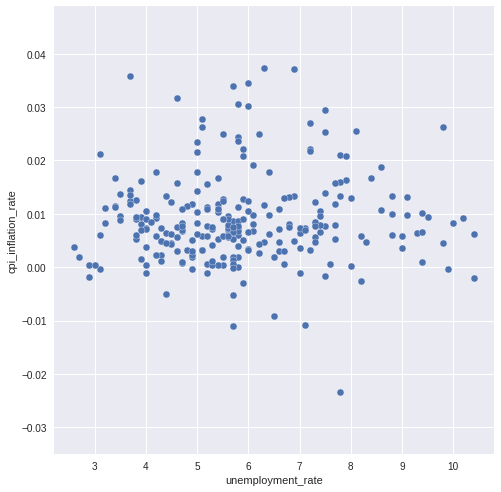

In [91]:
# explore some visualizations here

# let's take a look at a classic macro 101 relationship - the Phillips curve
# https://en.wikipedia.org/wiki/Phillips_curve
sns.pairplot(data=US_data, x_vars=['unemployment_rate'], y_vars=['cpi_inflation_rate'], size=7);

In [0]:
# doesnt seem to be much evidence of the Phillips curve in this correlation plot

In [93]:
# try out some basic models on this data, attempting to predict if the US economy will grow or recede the next quarter (classification)

# going to adjust the data a bit first, since we should be trying to predict with past data
# each will have 4 lagged variables for unemployment rate, inflation rate, and gdp growth rate

US_data_new = US_data.copy()

# lagged unemployment
US_data_new['unemployment_1'] = US_data_new['unemployment_rate'].shift(periods=1)
US_data_new['unemployment_2'] = US_data_new['unemployment_rate'].shift(periods=2)
US_data_new['unemployment_3'] = US_data_new['unemployment_rate'].shift(periods=3)
US_data_new['unemployment_4'] = US_data_new['unemployment_rate'].shift(periods=4)

# gdp lags
US_data_new['gdp_1'] = US_data_new['gdp_growth_rate'].shift(periods=1)
US_data_new['gdp_2'] = US_data_new['gdp_growth_rate'].shift(periods=2)
US_data_new['gdp_3'] = US_data_new['gdp_growth_rate'].shift(periods=3)
US_data_new['gdp_4'] = US_data_new['gdp_growth_rate'].shift(periods=4)

# inflation lags
US_data_new['cpi_1'] = US_data_new['cpi_inflation_rate'].shift(periods=1)
US_data_new['cpi_2'] = US_data_new['cpi_inflation_rate'].shift(periods=2)
US_data_new['cpi_3'] = US_data_new['cpi_inflation_rate'].shift(periods=3)
US_data_new['cpi_4'] = US_data_new['cpi_inflation_rate'].shift(periods=4)

# convert target to 0/1 instead of boolean
US_data_new['growth'].replace(False, 0, inplace=True)

# drop null rows for which we don't have new lagged variables
US_data_new = US_data_new.dropna()

# target and feature enumeration
target = ['growth']
features = ['unemployment_1', 'unemployment_2', 'unemployment_3', 'unemployment_4', 'gdp_1', 'gdp_2', 'gdp_3', 'gdp_4', 'cpi_1', 'cpi_2', 'cpi_3', 'cpi_4']

# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(US_data_new, random_state=0)

US_data_new.head()

,date,gdp_per_capita,unemployment_rate,cpi,gdp_growth_rate,cpi_inflation_rate,growth,unemployment_1,unemployment_2,unemployment_3,unemployment_4,gdp_1,gdp_2,gdp_3,gdp_4,cpi_1,cpi_2,cpi_3,cpi_4
5,1951-04-01,15968.0,3.1,25.92,0.013262,0.021277,1.0,3.7,4.2,5.0,5.8,0.009416,0.014557,0.034209,0.026846,0.035918,0.017865,0.017759,0.005955
6,1951-07-01,16223.0,3.1,25.91,0.015969,-0.000386,1.0,3.1,3.7,4.2,5.0,0.013262,0.009416,0.014557,0.034209,0.021277,0.035918,0.017865,0.017759
7,1951-10-01,16181.0,3.5,26.16,-0.002589,0.009649,0.0,3.1,3.1,3.7,4.2,0.015969,0.013262,0.009416,0.014557,-0.000386,0.021277,0.035918,0.017865
8,1952-01-01,16288.0,3.2,26.45,0.006613,0.011086,1.0,3.5,3.1,3.1,3.7,-0.002589,0.015969,0.013262,0.009416,0.009649,-0.000386,0.021277,0.035918
9,1952-04-01,16259.0,2.9,26.46,-0.001780,0.000378,0.0,3.2,3.5,3.1,3.1,0.006613,-0.002589,0.015969,0.013262,0.011086,0.009649,-0.000386,0.021277


In [0]:
# some useful reporting functions from the intro course
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

import itertools
  
# function for plotting a good looking confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


train_mse:  0.109375
Confusion matrix, without normalization


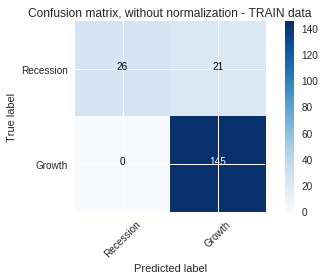

In [95]:
# lets try a basic decision tree classifier

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)
model.fit(train[features], train[target])

# predict values training data
train_predict = model.predict(train[features])

# calculate mse and print confusion matrix
train_mse = mean_absolute_error(train[target], train_predict)

print ('train_mse: ', train_mse)

# confusion matrix
cnf_matrix = confusion_matrix(train[target], train_predict)
class_names = ['Recession', 'Growth']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - TRAIN data')

plt.show();

test_mse:  0.21875
Confusion matrix, without normalization


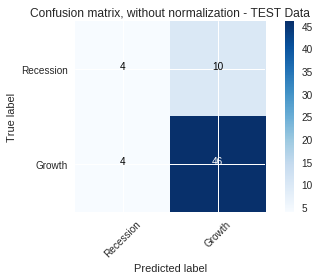

In [96]:
# test data validation
# predict values training data
test_predict = model.predict(test[features])

# calculate mse and print confusion matrix
test_mse = mean_absolute_error(test[target], test_predict)

print ('test_mse: ', test_mse)

# confusion matrix
cnf_matrix = confusion_matrix(test[target], test_predict)
class_names = ['Recession', 'Growth']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - TEST Data')

plt.show();

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

I explored possible relationships between unemployment rate, inflation, and GDP growth, a frequently discussed topic in macroeconomic analysis.

Unsurprisingly, I was unable to significantly predict even recession vs. growth using lagged variables for the past year.

Also unsurpisingly, a quick glance reveals the popular Phillips curve relationship does not hold over the observation period.

2.  What was the most challenging part of what you did?

Transforming the data coming from FRED's API.

3.  What was the most interesting thing you learned?

I cheated a little because I suspected most of the macroeconomic results presented. However, I enjoyed the process of piecing together Python code to solve the problem.

4.  What area would you like to explore with more time?

Quant trading/investing. I'd like to start working with some of the datasets on Quandl or Quantopian and begin testing algorithms.

This and AI research are my two main interests coming into the course.




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about